In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_PATH = os.path.join(os.getcwd(), '..', 'dataset', 'Churn_Modelling.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
# Adjsut col names
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
# Drop first 3 features
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.nunique(axis=0)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## EDA

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

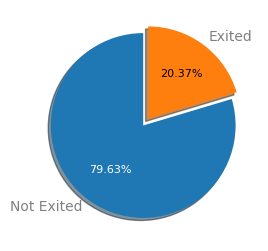

In [11]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64


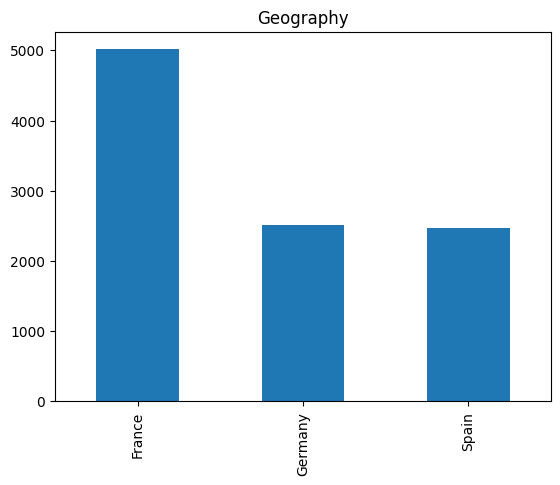

In [12]:
df.Geography.value_counts().plot(kind='bar')
plt.title('Geography')
print(df.Geography.value_counts(normalize=True))

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


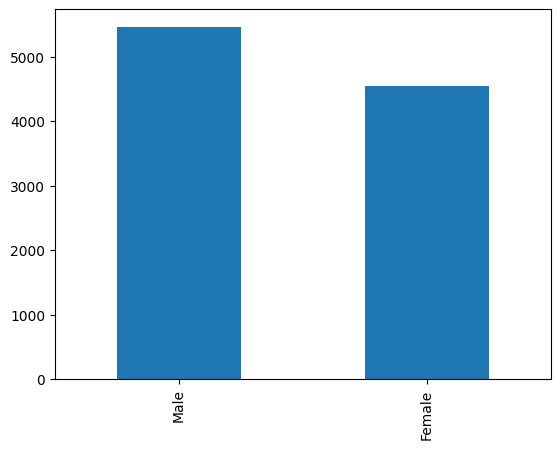

In [13]:
df.Gender.value_counts().plot(kind='bar')
print(df.Gender.value_counts(normalize=True))


In [14]:
print("The age of customers is in the range of",df.Age.min(),"to",df.Age.max())

The age of customers is in the range of 18 to 92


1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64


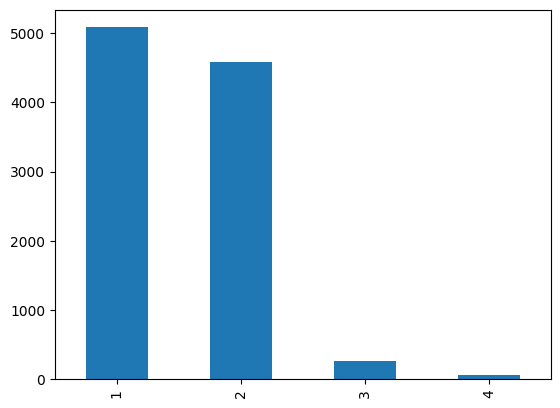

In [15]:
df.NumOfProducts.value_counts().plot(kind='bar')    
print(df.NumOfProducts.value_counts(normalize=True))

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64


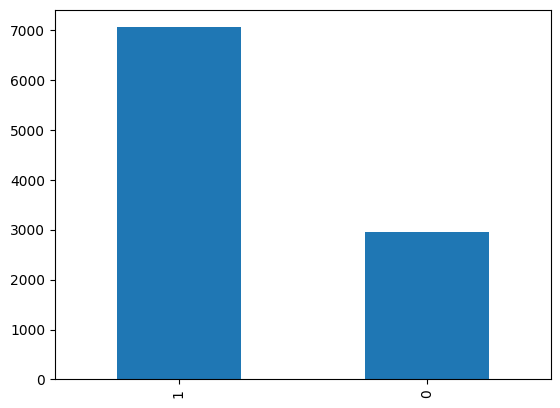

In [16]:
df.HasCrCard.value_counts().plot(kind='bar')
print(df.HasCrCard.value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


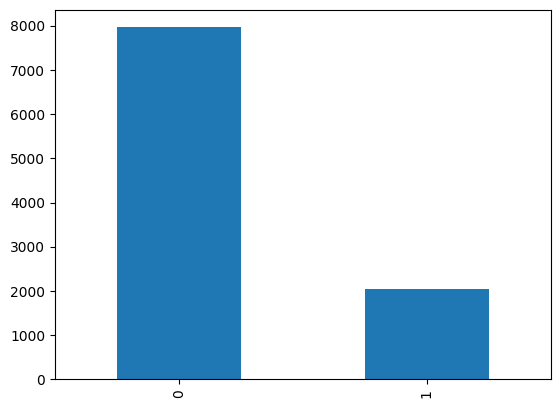

In [17]:
df.Exited.value_counts().plot(kind='bar')
print(df.Exited.value_counts(normalize=True))

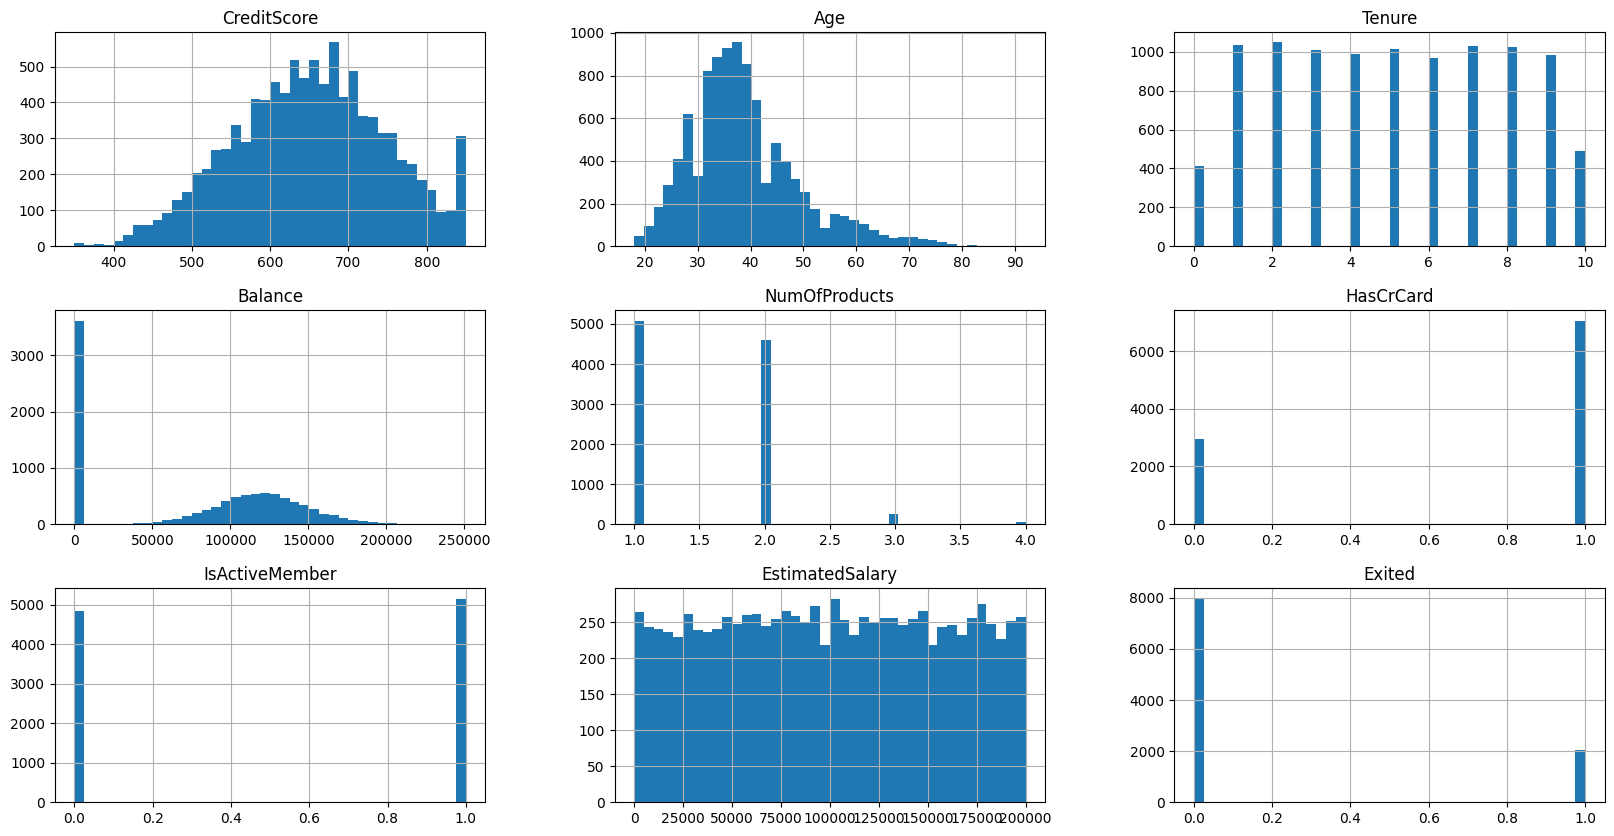

In [18]:
# Numerical cols
df.hist(bins=40, figsize=(20, 10))
plt.show()

In [19]:
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

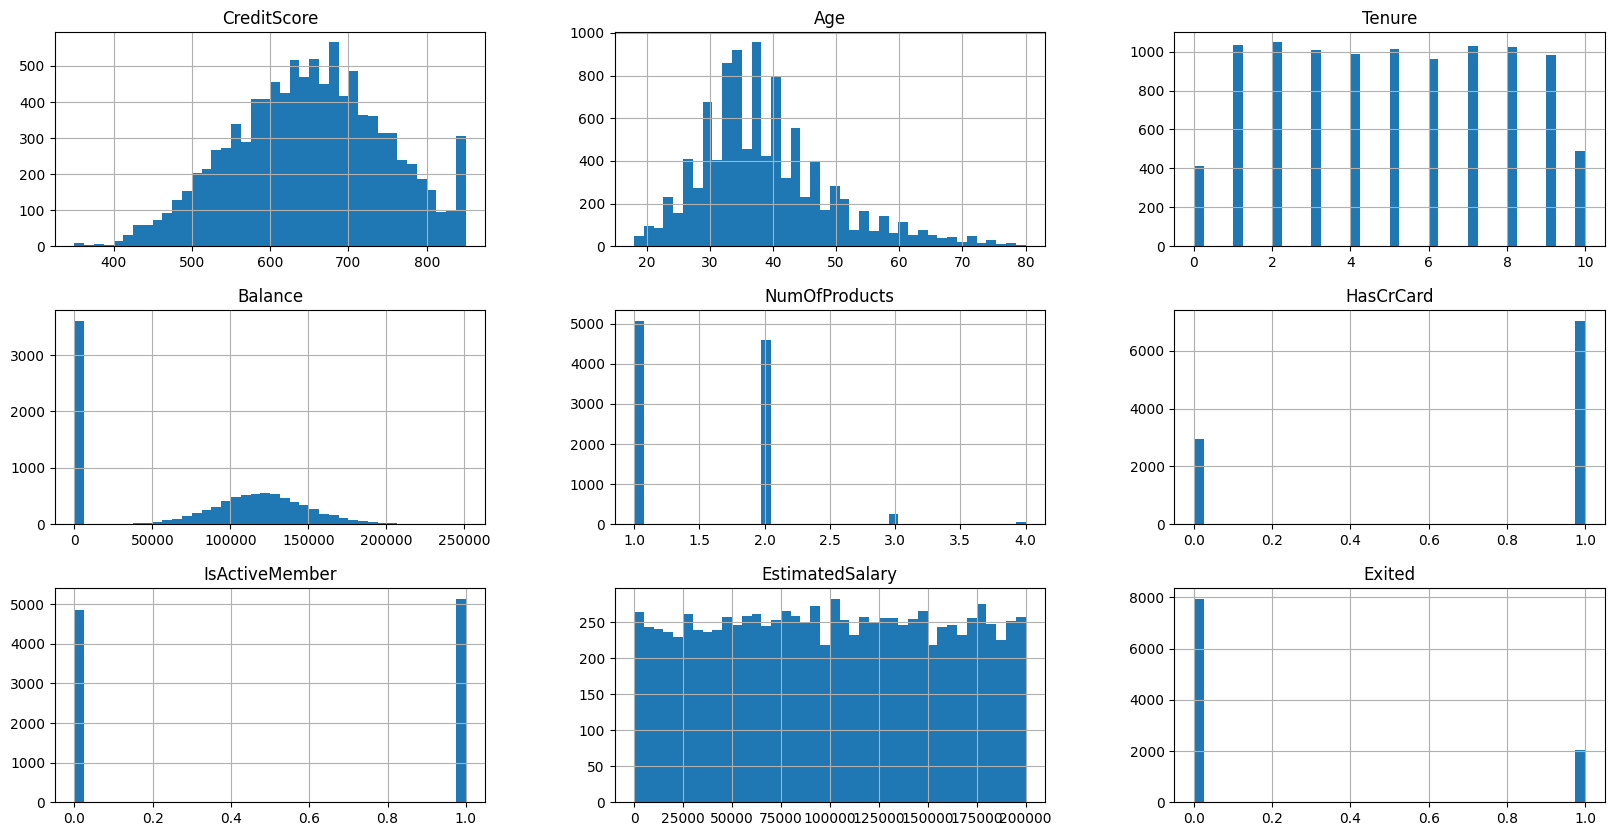

In [20]:
# Numerical cols
df.hist(bins=40, figsize=(20, 10))
plt.show()

In [21]:
df.groupby(['Geography','Gender'])['CreditScore'].mean()


Geography  Gender
France     Female    649.092642
           Male      649.934545
Germany    Female    653.093881
           Male      650.006855
Spain      Female    651.769513
           Male      651.091565
Name: CreditScore, dtype: float64

The average credit score of customers is almost the same depending on gender and geographical location


In [22]:
df.groupby(['Gender'])['Exited'].value_counts(normalize=True)

Gender  Exited
Female  0         0.749229
        1         0.250771
Male    0         0.835229
        1         0.164771
Name: Exited, dtype: float64

About 25% of women and 16% of men leave the bank.

In [23]:
df.groupby(['Geography'])['Exited'].value_counts(normalize=True)

Geography  Exited
France     0         0.838394
           1         0.161606
Germany    0         0.675180
           1         0.324820
Spain      0         0.833199
           1         0.166801
Name: Exited, dtype: float64

About 16% of the French, 32% of the Germans. 17% of Spanish leave the bank.


In [24]:
df.groupby(['Tenure'])['Exited'].value_counts(normalize=True)

Tenure  Exited
0       0         0.769976
        1         0.230024
1       0         0.775411
        1         0.224589
2       0         0.808023
        1         0.191977
3       0         0.788690
        1         0.211310
4       0         0.794742
        1         0.205258
5       0         0.793274
        1         0.206726
6       0         0.796680
        1         0.203320
7       0         0.827821
        1         0.172179
8       0         0.808407
        1         0.191593
9       0         0.783537
        1         0.216463
10      0         0.793033
        1         0.206967
Name: Exited, dtype: float64

About 23% of those who have a bank account for a year or less, leave the bank


In [25]:
df.groupby(['NumOfProducts'])['Exited'].value_counts(normalize=True)


NumOfProducts  Exited
1              0         0.722780
               1         0.277220
2              0         0.924067
               1         0.075933
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: Exited, dtype: float64

All people who have 4 products leave the bank.


In [26]:
df.groupby(['IsActiveMember'])['Exited'].value_counts(normalize=True)

IsActiveMember  Exited
0               0         0.731642
                1         0.268358
1               0         0.857004
                1         0.142996
Name: Exited, dtype: float64

About 14% of those who are active members of the bank leave it


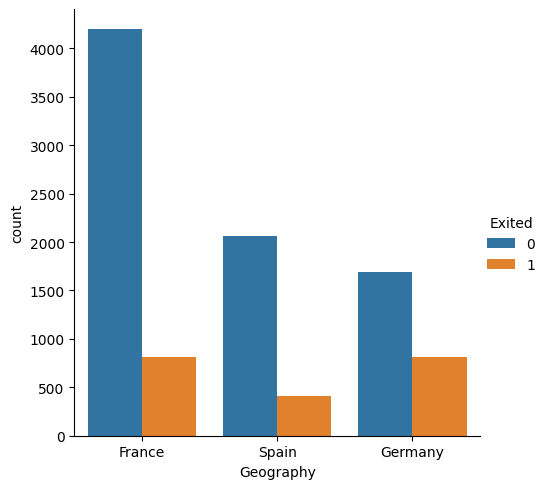

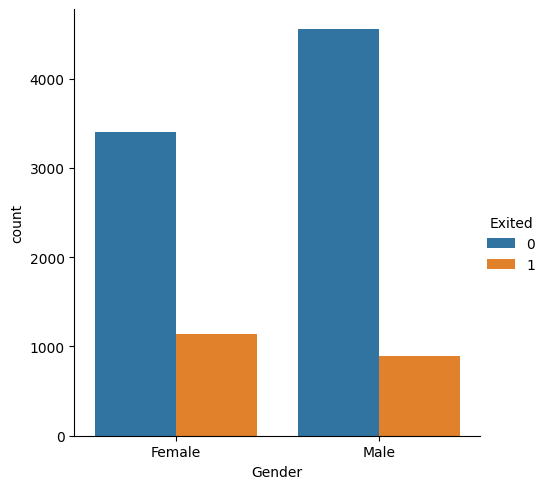

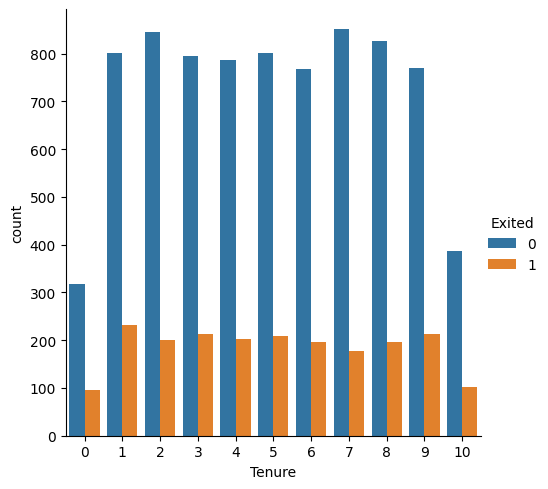

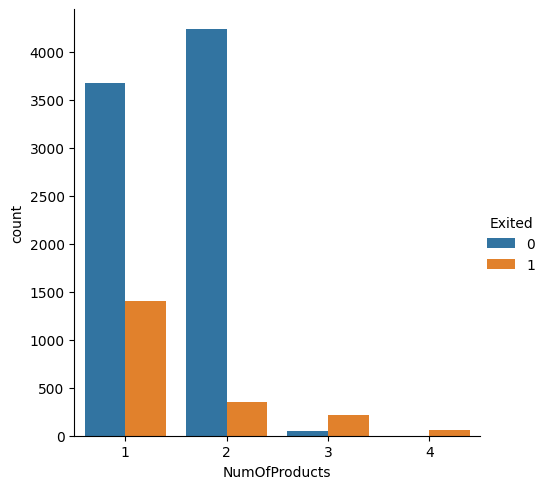

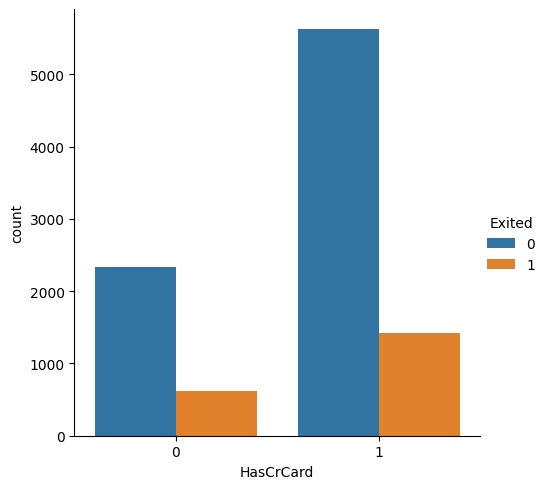

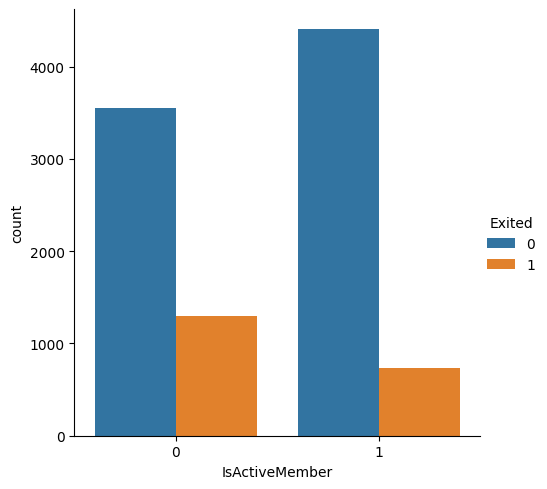

In [27]:
sns.catplot(x='Geography', hue = 'Exited', data = df, kind="count")
sns.catplot(x='Gender', hue = 'Exited', data = df, kind="count")
sns.catplot(x='Tenure', hue = 'Exited', data = df, kind="count")
sns.catplot(x='NumOfProducts', hue = 'Exited', data = df, kind="count")
sns.catplot(x='HasCrCard', hue = 'Exited', data = df, kind="count")
sns.catplot(x='IsActiveMember', hue = 'Exited', data = df, kind="count")